# Step 1: Import Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Create SQLite Database and Table with Dummy Data (One-Time Setup)

In [2]:
# Connect to SQLite database (or create it)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        order_id INTEGER,
        product TEXT,
        quantity INTEGER,
        price REAL,
        order_date TEXT
    )
''')

# Insert sample data
sample_data = [
    (1, 'Laptop', 2, 45000, '2025-06-01'),
    (2, 'Mouse', 5, 500, '2025-06-02'),
    (3, 'Keyboard', 3, 800, '2025-06-03'),
    (4, 'Laptop', 1, 47000, '2025-06-04'),
    (5, 'Mouse', 10, 450, '2025-06-05'),
]

cursor.executemany('INSERT INTO sales VALUES (?, ?, ?, ?, ?)', sample_data)
conn.commit()


In [3]:
sample_data

[(1, 'Laptop', 2, 45000, '2025-06-01'),
 (2, 'Mouse', 5, 500, '2025-06-02'),
 (3, 'Keyboard', 3, 800, '2025-06-03'),
 (4, 'Laptop', 1, 47000, '2025-06-04'),
 (5, 'Mouse', 10, 450, '2025-06-05')]

# Step 3: Query to Get Total Quantity and Revenue per Product

In [4]:
query = '''
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue 
    FROM sales 
    GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print("Sales Summary:\n", df)


Sales Summary:
     product  total_qty   revenue
0  Keyboard          3    2400.0
1    Laptop          3  137000.0
2     Mouse         15    7000.0


# Step 4: Plot Bar Chart using Matplotlib

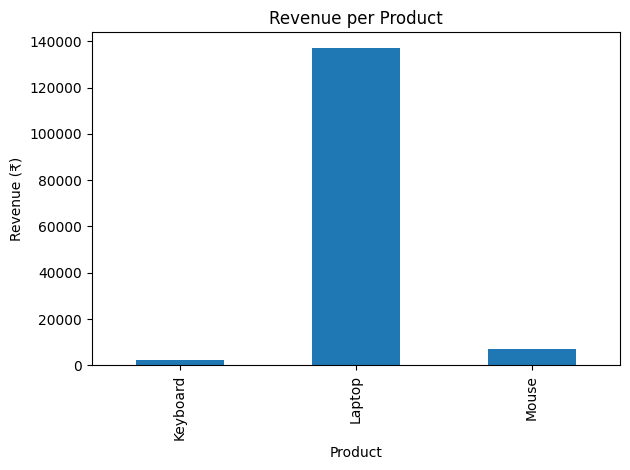

In [5]:
# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue per Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


# Chart 2: Quantity Sold per Product

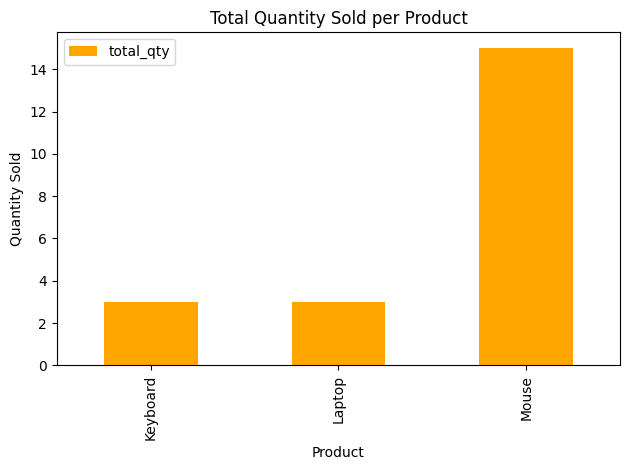

In [7]:
df.plot(kind='bar', x='product', y='total_qty', color='orange')
plt.title("Total Quantity Sold per Product")
plt.ylabel("Quantity Sold")
plt.xlabel("Product")
plt.tight_layout()
plt.show()


# Chart 3: Daily Sales Revenue (Time Series)

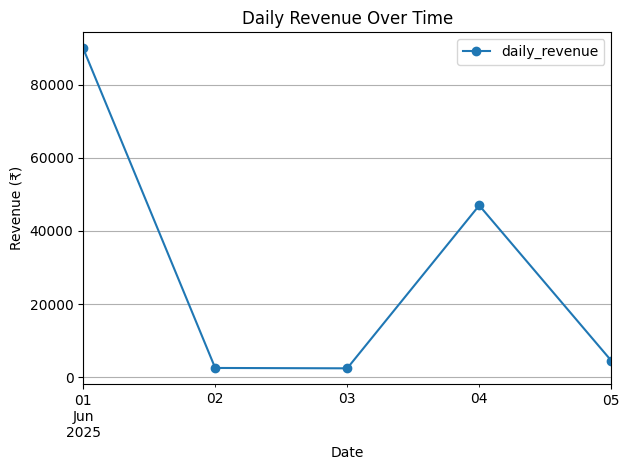

In [8]:
query2 = '''
    SELECT 
        order_date,
        SUM(quantity * price) AS daily_revenue
    FROM sales
    GROUP BY order_date
'''

df_date = pd.read_sql_query(query2, conn)
df_date['order_date'] = pd.to_datetime(df_date['order_date'])

df_date.plot(kind='line', x='order_date', y='daily_revenue', marker='o')
plt.title("Daily Revenue Over Time")
plt.ylabel("Revenue (₹)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


# Chart 4: Product-wise Revenue Share (Pie Chart)

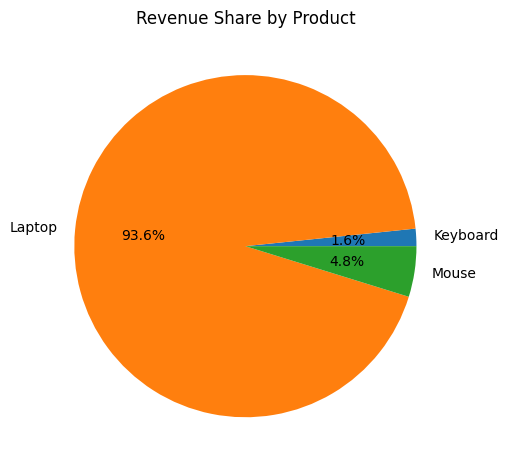

In [9]:
df.set_index('product')['revenue'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Share by Product")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()
